In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
df=pd.read_csv("HR-Employee-Attrition.csv")


In [11]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

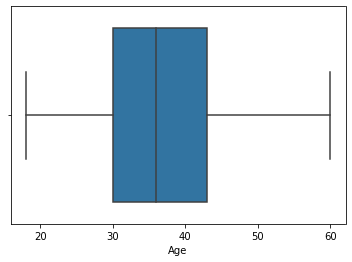

In [16]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DailyRate'>

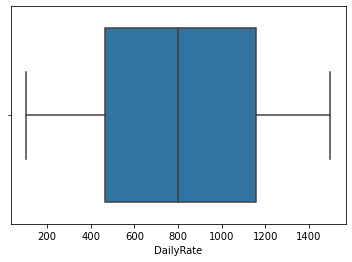

In [17]:
sns.boxplot(df['DailyRate'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DistanceFromHome'>

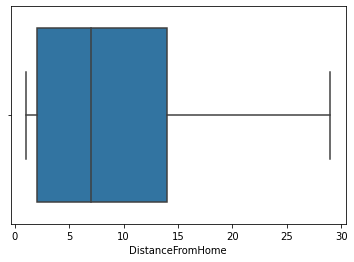

In [18]:
sns.boxplot(df['DistanceFromHome'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education'>

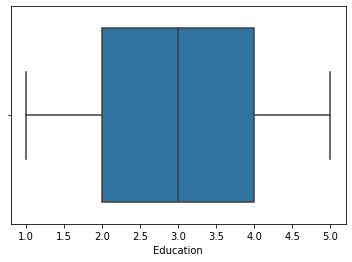

In [19]:
sns.boxplot(df['Education'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EmployeeCount'>

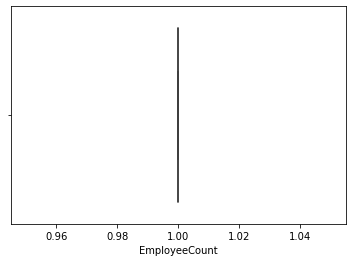

In [20]:
sns.boxplot(df['EmployeeCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EmployeeNumber'>

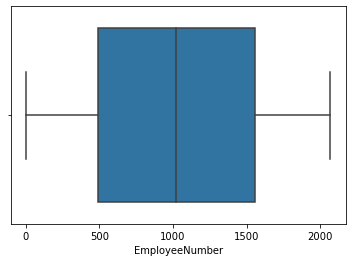

In [21]:

sns.boxplot(df['EmployeeNumber'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction'>

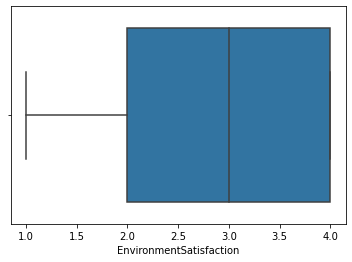

In [22]:
sns.boxplot(df['EnvironmentSatisfaction'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HourlyRate'>

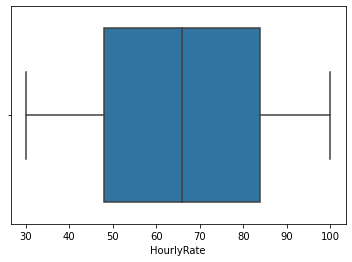

In [23]:
sns.boxplot(df['HourlyRate'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobInvolvement'>

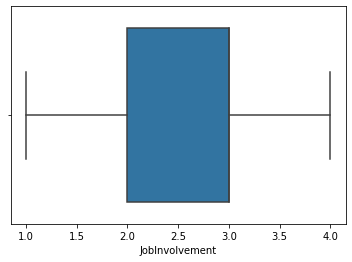

In [24]:
sns.boxplot(df['JobInvolvement'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel'>

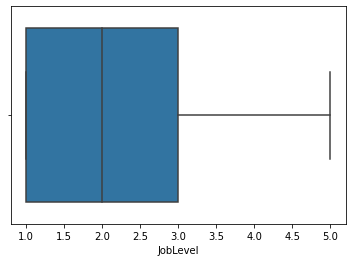

In [25]:
sns.boxplot(df['JobLevel'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction'>

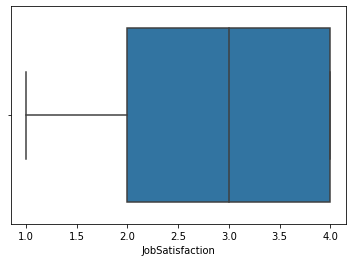

In [26]:
sns.boxplot(df['JobSatisfaction'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

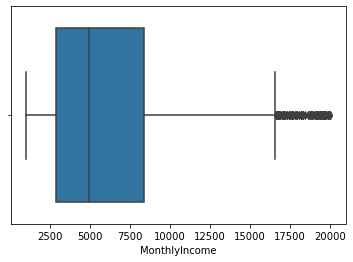

In [27]:
sns.boxplot(df['MonthlyIncome'])

In [28]:
q1=df['MonthlyIncome'].quantile(0.25)

In [29]:
q3=df['MonthlyIncome'].quantile(0.75)

In [30]:
IQR=q3-q1

In [31]:
lower=q1-1.5*IQR

In [32]:
upper=q3+1.5*IQR

In [33]:
df=df[(df['MonthlyIncome']>lower) & (df['MonthlyIncome']<upper)]

In [34]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyRate'>

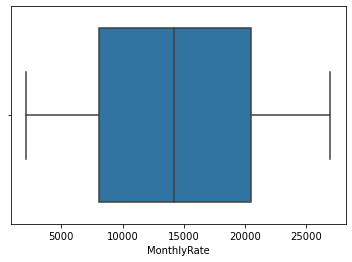

In [35]:
sns.boxplot(df['MonthlyRate'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked'>

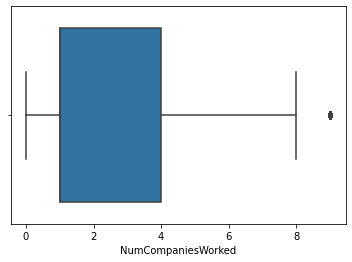

In [36]:
sns.boxplot(df['NumCompaniesWorked'])

In [37]:
q1=df['NumCompaniesWorked'].quantile(0.25)

In [38]:
q3=df['NumCompaniesWorked'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower=q1-1.5*IQR

In [41]:
upper=q3+1.5*IQR

In [42]:
df=df[(df['NumCompaniesWorked']>lower) & (df['NumCompaniesWorked']<upper)]

In [43]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike'>

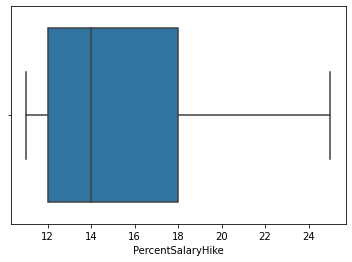

In [44]:
sns.boxplot(df['PercentSalaryHike'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating'>

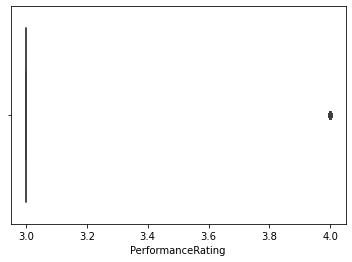

In [45]:
sns.boxplot(df['PerformanceRating'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RelationshipSatisfaction'>

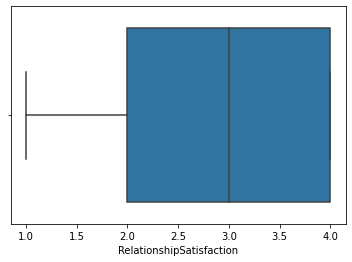

In [46]:
sns.boxplot(df['RelationshipSatisfaction'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StandardHours'>

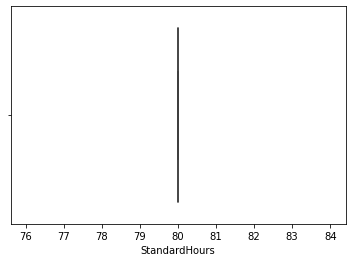

In [47]:
sns.boxplot(df['StandardHours'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockOptionLevel'>

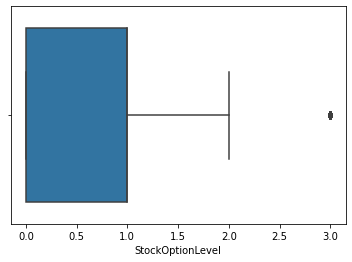

In [48]:
sns.boxplot(df['StockOptionLevel'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

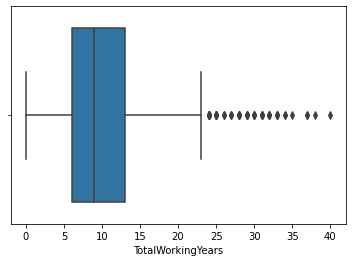

In [49]:
sns.boxplot(df['TotalWorkingYears'])

In [50]:
q1=df['TotalWorkingYears'].quantile(0.25)

In [51]:
q3=df['TotalWorkingYears'].quantile(0.75)

In [52]:
IQR=q3-q1

In [53]:
lower=q1-1.5*IQR

In [54]:
upper=q3+1.5*IQR

In [55]:
df=df[(df['TotalWorkingYears']>lower) & (df['TotalWorkingYears']<upper)]

In [56]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

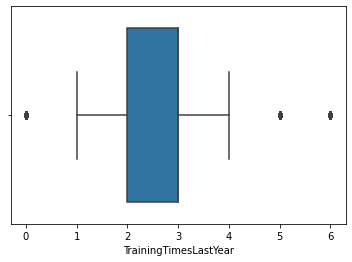

In [57]:
sns.boxplot(df['TrainingTimesLastYear'])

In [58]:
q1=df['TrainingTimesLastYear'].quantile(0.25)

In [59]:
q3=df['TrainingTimesLastYear'].quantile(0.75)

In [60]:
IQR=q3-q1

In [61]:
lower=q1-1.5*IQR

In [62]:
upper=q3+1.5*IQR

In [63]:
df=df[(df['TrainingTimesLastYear']>lower) & (df['TrainingTimesLastYear']<upper)]

In [64]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WorkLifeBalance'>

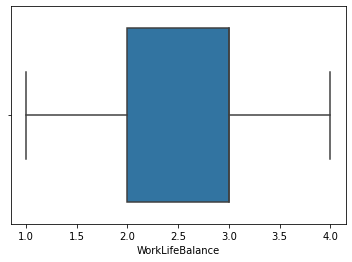

In [65]:
sns.boxplot(df['WorkLifeBalance'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

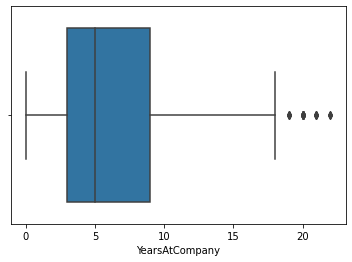

In [66]:
sns.boxplot(df['YearsAtCompany'])

In [67]:
q1=df['YearsAtCompany'].quantile(0.25)

In [68]:
q3=df['YearsAtCompany'].quantile(0.75)

In [69]:
IQR=q3-q1

In [70]:
lower=q1-1.5*IQR

In [71]:
upper=q3+1.5*IQR

In [72]:
df=df[(df['YearsAtCompany']>lower) & (df['YearsAtCompany']<upper)]

In [73]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsInCurrentRole'>

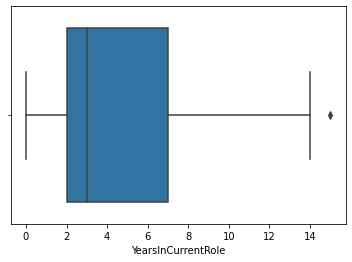

In [74]:
sns.boxplot(df['YearsInCurrentRole'])

In [75]:
q1=df['YearsInCurrentRole'].quantile(0.25)

In [76]:
q3=df['YearsInCurrentRole'].quantile(0.75)

In [77]:
IQR=q3-q1

In [78]:
lower=q1-1.5*IQR

In [79]:
upper=q3+1.5*IQR

In [80]:
df=df[(df['YearsInCurrentRole']>lower) & (df['YearsInCurrentRole']<upper)]

In [81]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

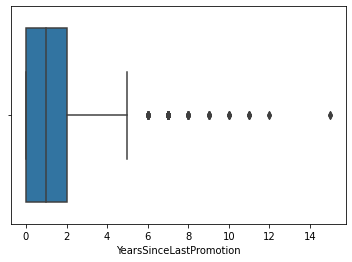

In [82]:
sns.boxplot(df['YearsSinceLastPromotion'])

In [83]:
q1=df['YearsSinceLastPromotion'].quantile(0.25)

In [84]:
q3=df['YearsSinceLastPromotion'].quantile(0.75)

In [85]:
IQR=q3-q1

In [86]:
lower=q1-1.5*IQR

In [87]:
upper=q3+1.5*IQR

In [88]:
df=df[(df['YearsSinceLastPromotion']>lower) & (df['YearsSinceLastPromotion']<upper)]

In [89]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

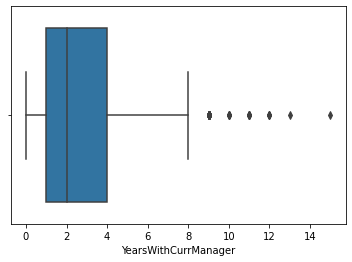

In [90]:
sns.boxplot(df['YearsWithCurrManager'])

In [91]:
q1=df['YearsWithCurrManager'].quantile(0.25)

In [92]:
q3=df['YearsWithCurrManager'].quantile(0.75)

In [93]:
IQR=q3-q1

In [94]:
lower=q1-1.5*IQR

In [95]:
upper=q3+1.5*IQR

In [96]:
df=df[(df['YearsWithCurrManager']>lower) & (df['YearsWithCurrManager']<upper)]

In [97]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

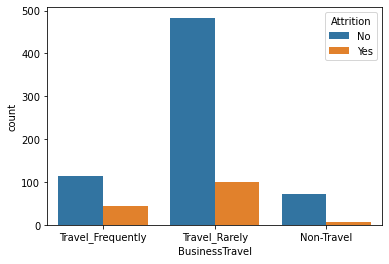

In [98]:
sns.countplot(x=df['BusinessTravel'],hue=df['Attrition'])

<AxesSubplot:xlabel='Department', ylabel='count'>

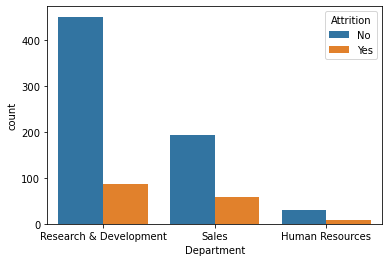

In [99]:
sns.countplot(x=df['Department'],hue=df['Attrition'])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

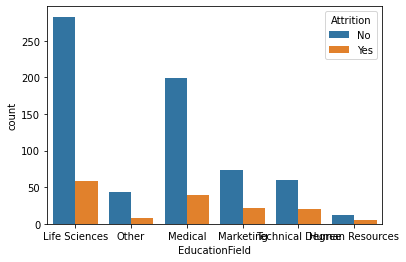

In [100]:
sns.countplot(x=df['EducationField'],hue=df['Attrition'])

In [101]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

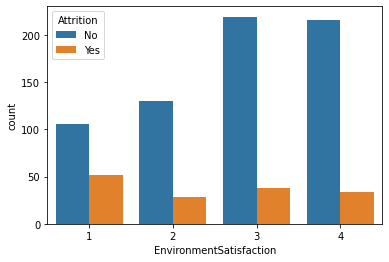

In [102]:
sns.countplot(x=df['EnvironmentSatisfaction'],hue=df['Attrition'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

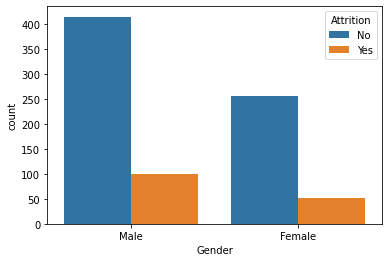

In [103]:
sns.countplot(x=df['Gender'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

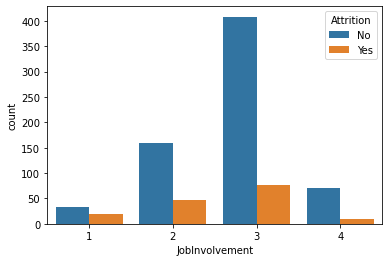

In [104]:
sns.countplot(x=df['JobInvolvement'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

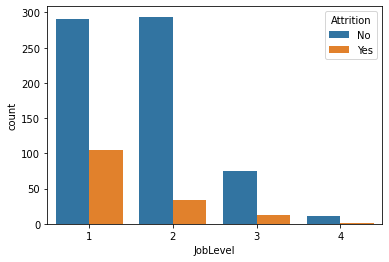

In [105]:
sns.countplot(x=df['JobLevel'],hue=df['Attrition'])

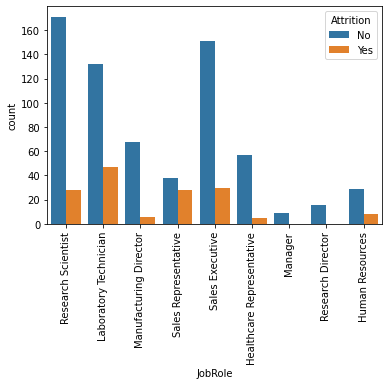

In [106]:
sns.countplot(x=df['JobRole'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

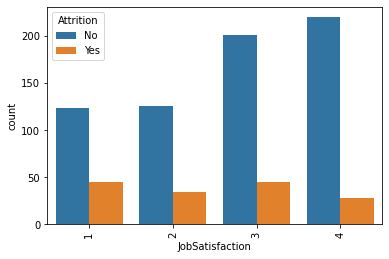

In [107]:
sns.countplot(x=df['JobSatisfaction'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

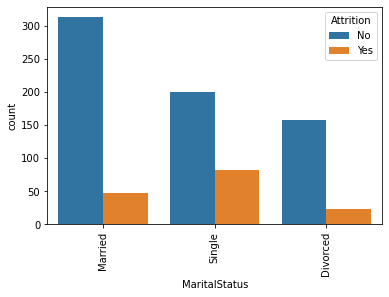

In [108]:
sns.countplot(x=df['MaritalStatus'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

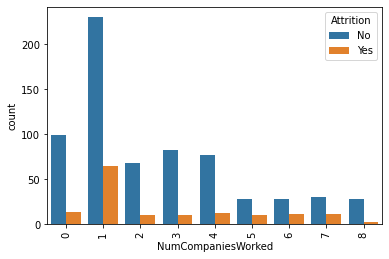

In [109]:
sns.countplot(x=df['NumCompaniesWorked'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

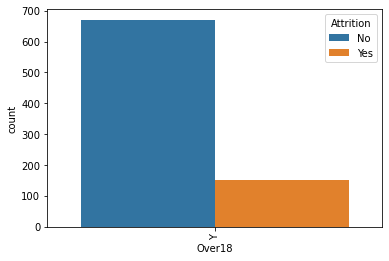

In [110]:
sns.countplot(x=df['Over18'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

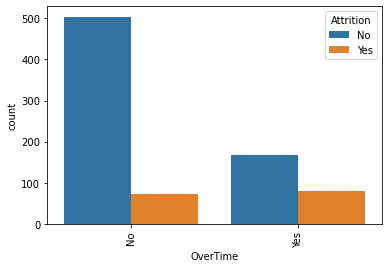

In [111]:
sns.countplot(x=df['OverTime'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

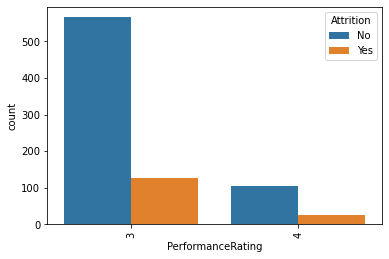

In [112]:
sns.countplot(x=df['PerformanceRating'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

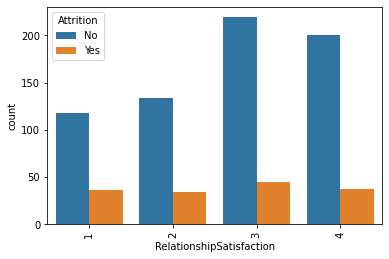

In [113]:

sns.countplot(x=df['RelationshipSatisfaction'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

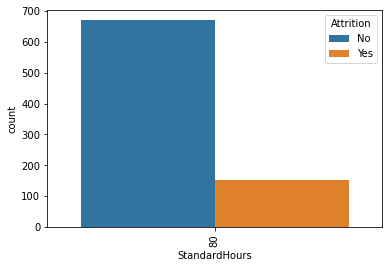

In [114]:
sns.countplot(x=df['StandardHours'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

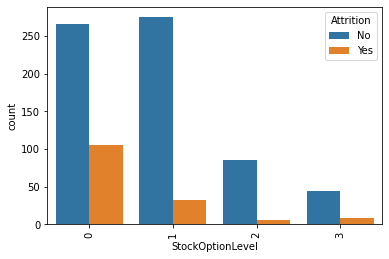

In [115]:
sns.countplot(x=df['StockOptionLevel'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

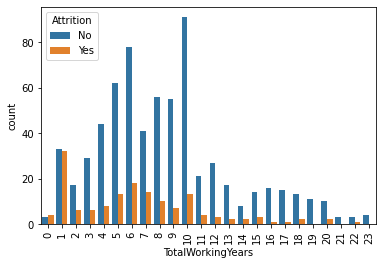

In [116]:

sns.countplot(x=df['TotalWorkingYears'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

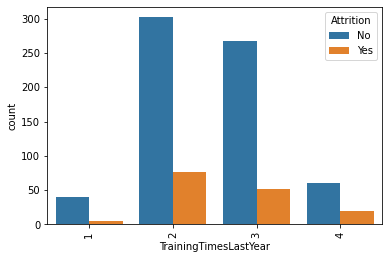

In [117]:
sns.countplot(x=df['TrainingTimesLastYear'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

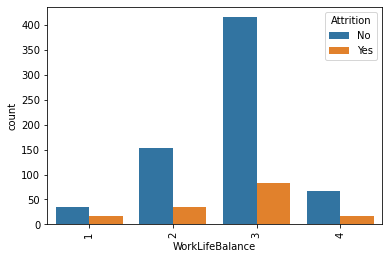

In [118]:

sns.countplot(x=df['WorkLifeBalance'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

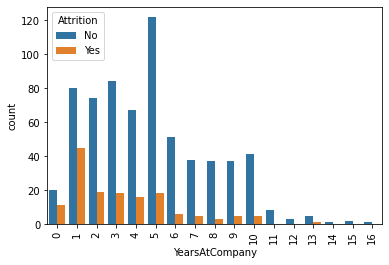

In [119]:
sns.countplot(x=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

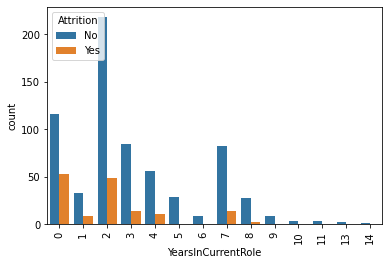

In [120]:
sns.countplot(x=df['YearsInCurrentRole'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

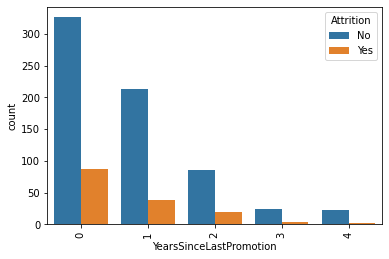

In [121]:
sns.countplot(x=df['YearsSinceLastPromotion'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

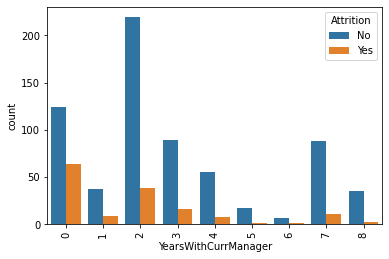

In [122]:

sns.countplot(x=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

In [123]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:xlabel='Department', ylabel='Age'>

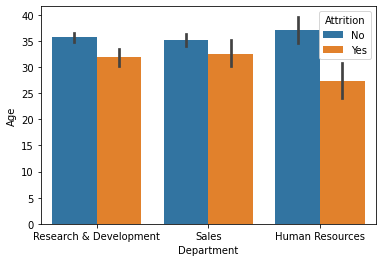

In [124]:
sns.barplot(x=df['Department'],y=df['Age'],hue=df['Attrition'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='Age'>

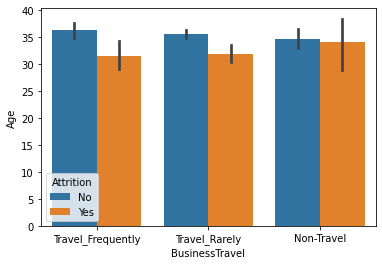

In [125]:
sns.barplot(x=df['BusinessTravel'],y=df['Age'],hue=df['Attrition'])

<AxesSubplot:xlabel='EducationField', ylabel='Age'>

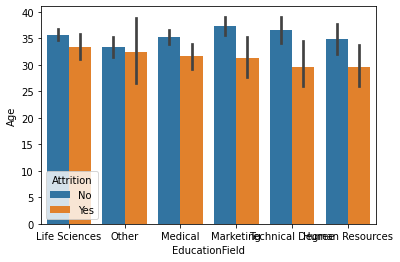

In [126]:
sns.barplot(x=df['EducationField'],y=df['Age'],hue=df['Attrition'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

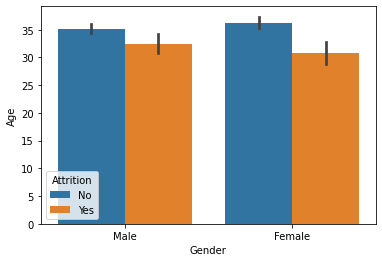

In [127]:
sns.barplot(x=df['Gender'],y=df['Age'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='Age'>

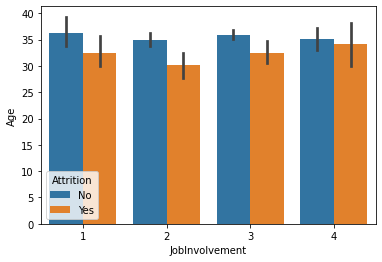

In [128]:
sns.barplot(x=df['JobInvolvement'],y=df['Age'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

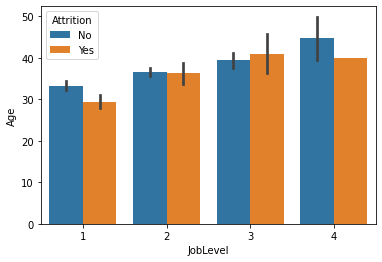

In [129]:
sns.barplot(x=df['JobLevel'],y=df['Age'],hue=df['Attrition'])

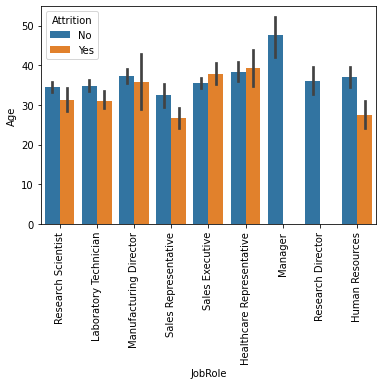

In [130]:
sns.barplot(x=df['JobRole'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

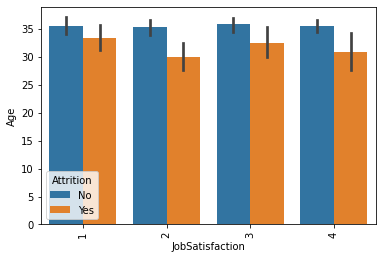

In [131]:

sns.barplot(x=df['JobSatisfaction'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

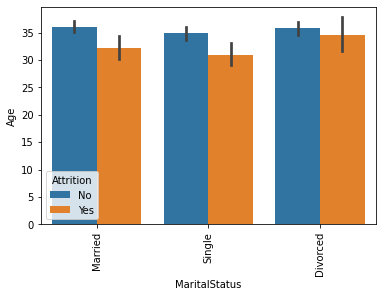

In [132]:
sns.barplot(x=df['MaritalStatus'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

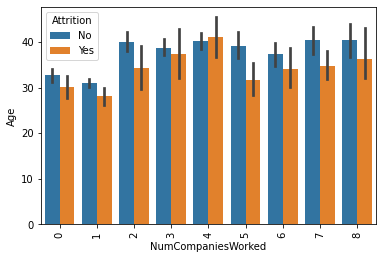

In [133]:

sns.barplot(x=df['NumCompaniesWorked'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

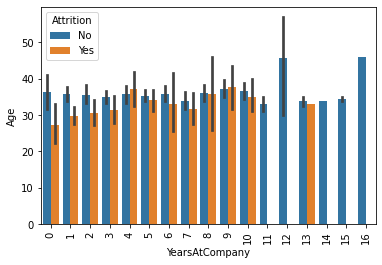

In [134]:
sns.barplot(x=df['YearsAtCompany'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

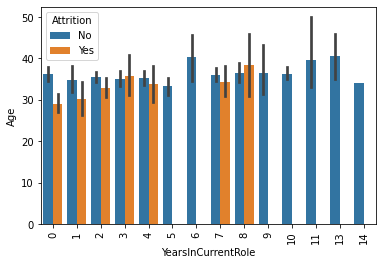

In [135]:

sns.barplot(x=df['YearsInCurrentRole'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

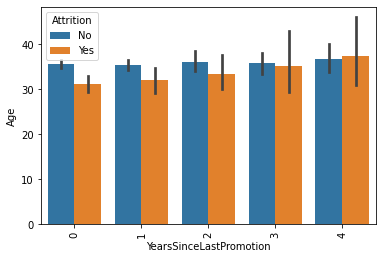

In [136]:
sns.barplot(x=df['YearsSinceLastPromotion'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

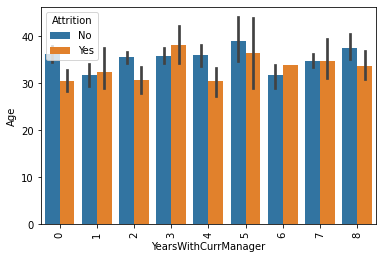

In [137]:

sns.barplot(x=df['YearsWithCurrManager'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

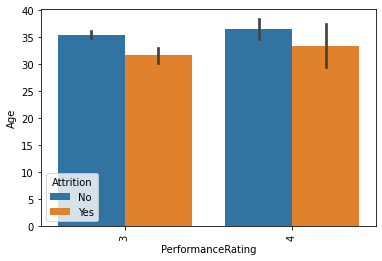

In [138]:


sns.barplot(x=df['PerformanceRating'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

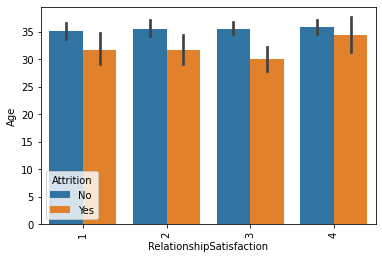

In [139]:
sns.barplot(x=df['RelationshipSatisfaction'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

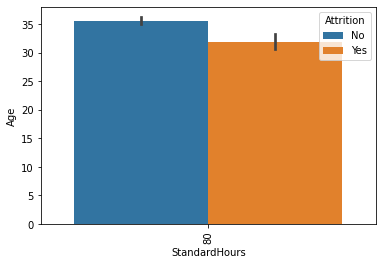

In [140]:
sns.barplot(x=df['StandardHours'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

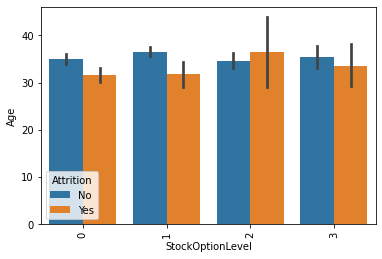

In [141]:
sns.barplot(x=df['StockOptionLevel'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

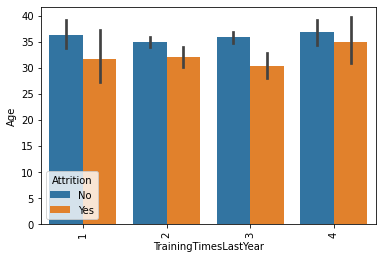

In [142]:
sns.barplot(x=df['TrainingTimesLastYear'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

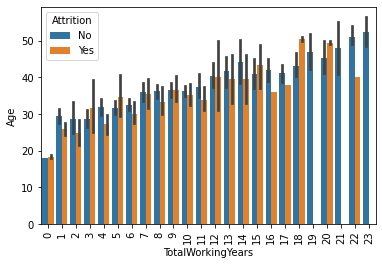

In [143]:
sns.barplot(x=df['TotalWorkingYears'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

In [144]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


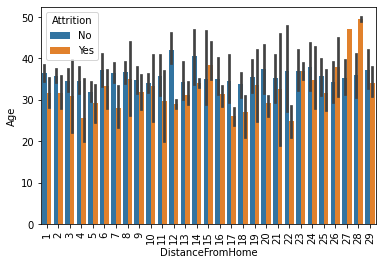

In [145]:
sns.barplot(x=df['DistanceFromHome'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

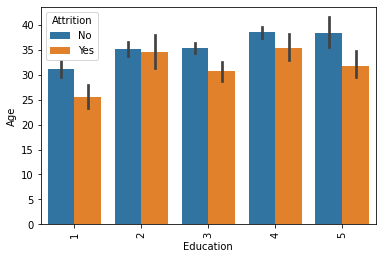

In [146]:
sns.barplot(x=df['Education'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

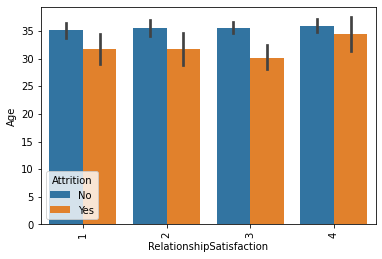

In [147]:
sns.barplot(x=df['RelationshipSatisfaction'],y=df['Age'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

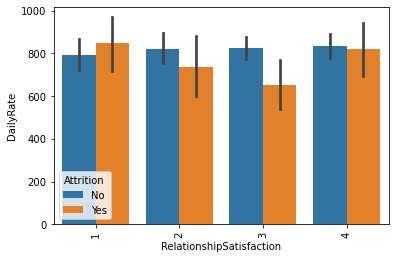

In [148]:

sns.barplot(x=df['RelationshipSatisfaction'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

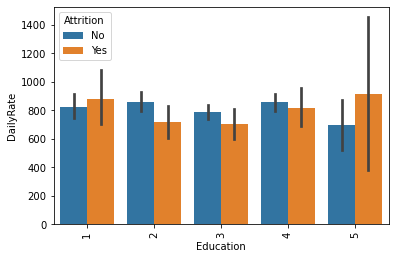

In [149]:
sns.barplot(x=df['Education'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

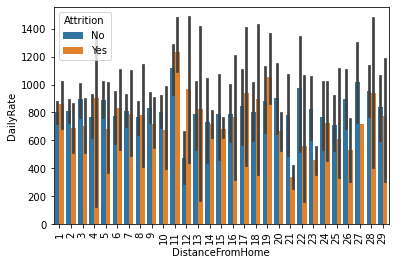

In [150]:
sns.barplot(x=df['DistanceFromHome'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

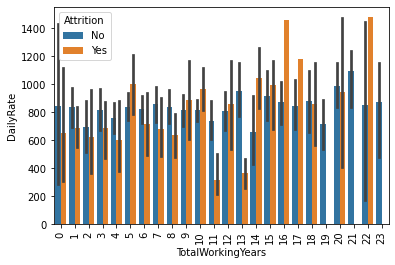

In [151]:
sns.barplot(x=df['TotalWorkingYears'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

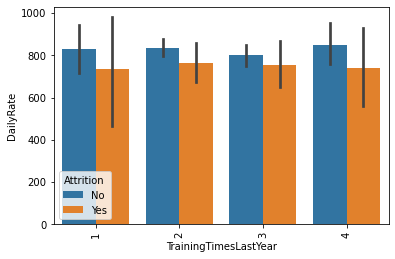

In [152]:
sns.barplot(x=df['TrainingTimesLastYear'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

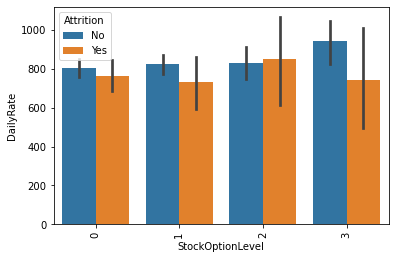

In [153]:
sns.barplot(x=df['StockOptionLevel'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

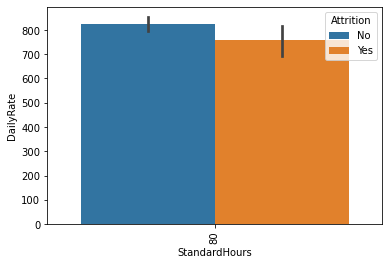

In [154]:
sns.barplot(x=df['StandardHours'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

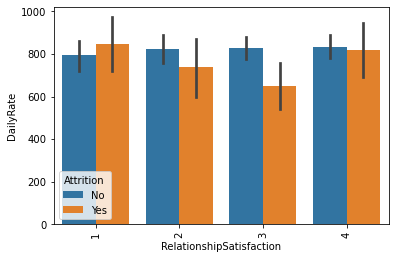

In [155]:
sns.barplot(x=df['RelationshipSatisfaction'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

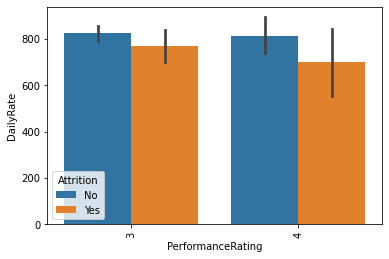

In [156]:
sns.barplot(x=df['PerformanceRating'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

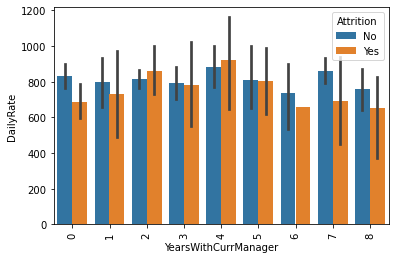

In [157]:
sns.barplot(x=df['YearsWithCurrManager'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

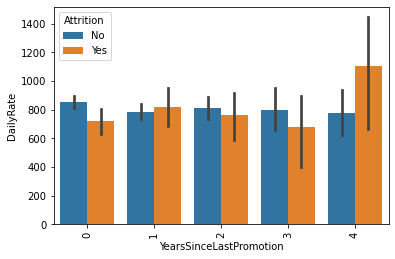

In [158]:
sns.barplot(x=df['YearsSinceLastPromotion'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

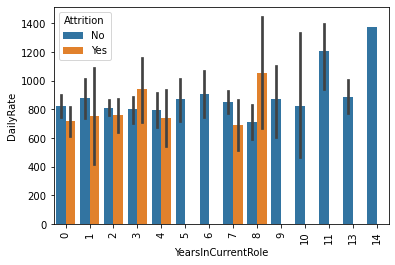

In [159]:
sns.barplot(x=df['YearsInCurrentRole'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

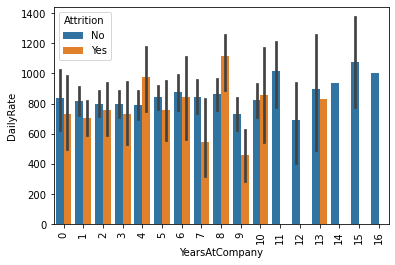

In [160]:
sns.barplot(x=df['YearsAtCompany'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

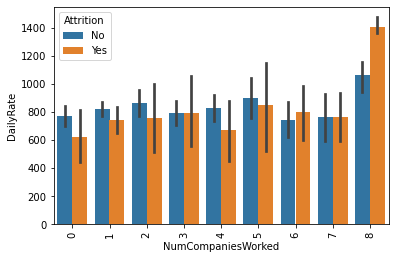

In [161]:
sns.barplot(x=df['NumCompaniesWorked'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Department', ylabel='DailyRate'>

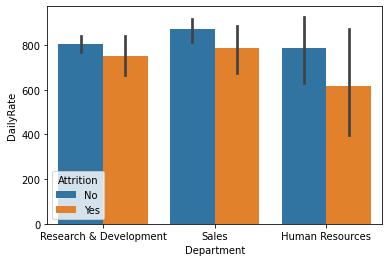

In [162]:
sns.barplot(x=df['Department'],y=df['DailyRate'],hue=df['Attrition'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='DailyRate'>

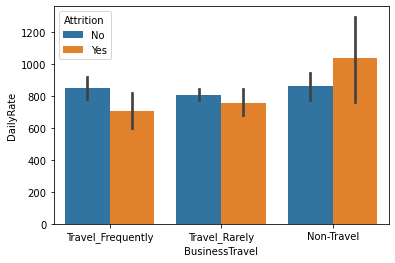

In [163]:
sns.barplot(x=df['BusinessTravel'],y=df['DailyRate'],hue=df['Attrition'])

<AxesSubplot:xlabel='EducationField', ylabel='DailyRate'>

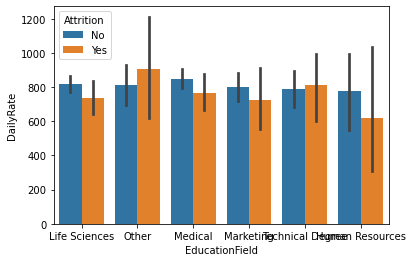

In [164]:
sns.barplot(x=df['EducationField'],y=df['DailyRate'],hue=df['Attrition'])

<AxesSubplot:xlabel='Gender', ylabel='DailyRate'>

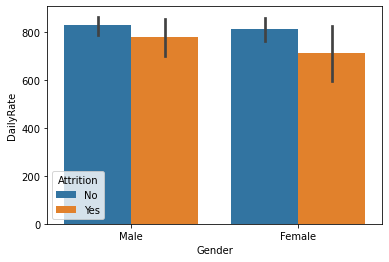

In [165]:
sns.barplot(x=df['Gender'],y=df['DailyRate'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='DailyRate'>

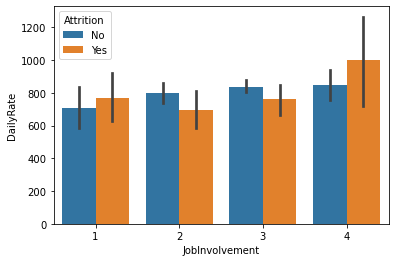

In [166]:
sns.barplot(x=df['JobInvolvement'],y=df['DailyRate'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobLevel', ylabel='DailyRate'>

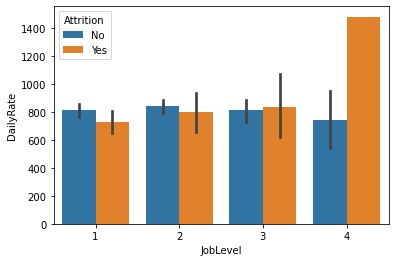

In [167]:
sns.barplot(x=df['JobLevel'],y=df['DailyRate'],hue=df['Attrition'])

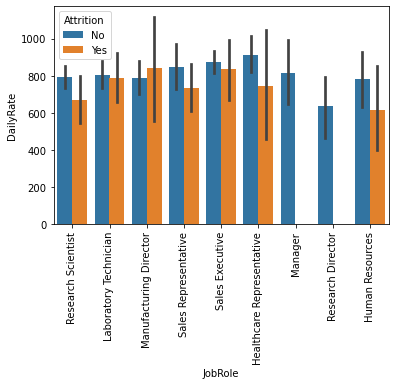

In [168]:
sns.barplot(x=df['JobRole'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

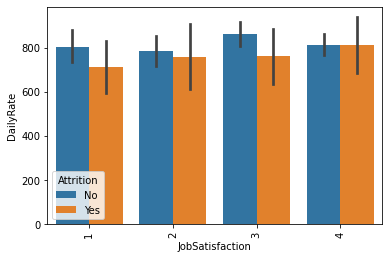

In [169]:

sns.barplot(x=df['JobSatisfaction'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

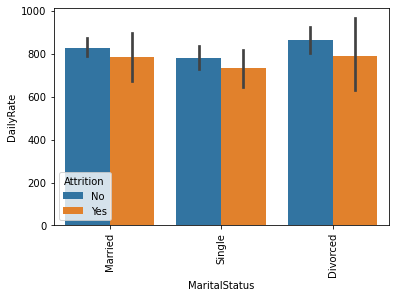

In [170]:
sns.barplot(x=df['MaritalStatus'],y=df['DailyRate'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

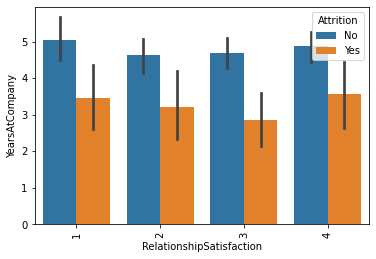

In [171]:
sns.barplot(x=df['RelationshipSatisfaction'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

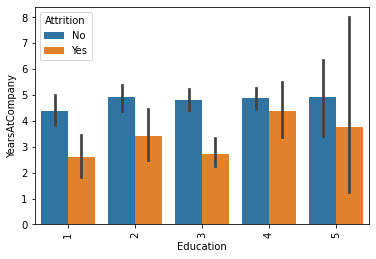

In [172]:
sns.barplot(x=df['Education'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

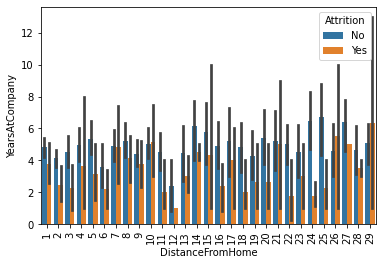

In [173]:
sns.barplot(x=df['DistanceFromHome'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

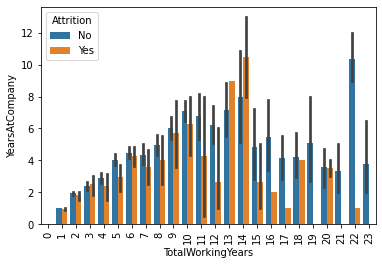

In [174]:
sns.barplot(x=df['TotalWorkingYears'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

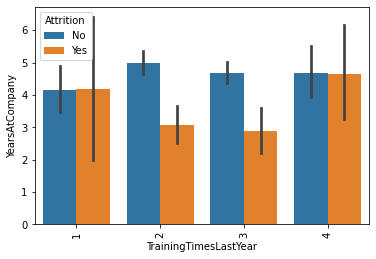

In [175]:
sns.barplot(x=df['TrainingTimesLastYear'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

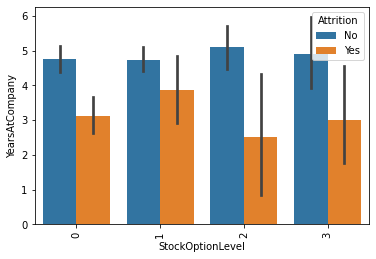

In [176]:
sns.barplot(x=df['StockOptionLevel'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

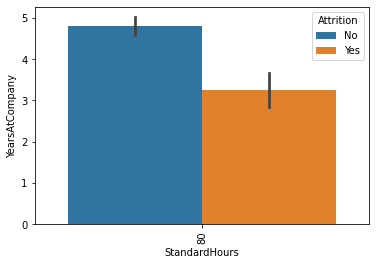

In [177]:
sns.barplot(x=df['StandardHours'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

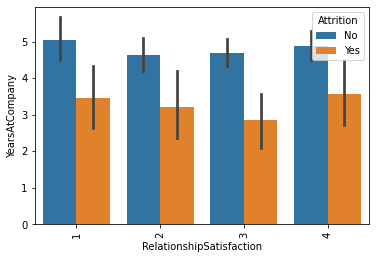

In [178]:
sns.barplot(x=df['RelationshipSatisfaction'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

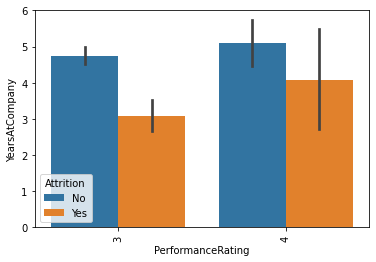

In [179]:
sns.barplot(x=df['PerformanceRating'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

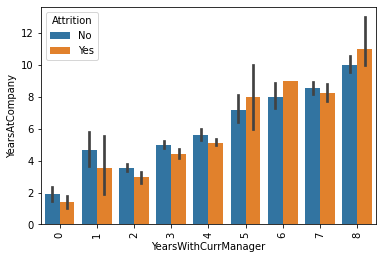

In [180]:
sns.barplot(x=df['YearsWithCurrManager'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

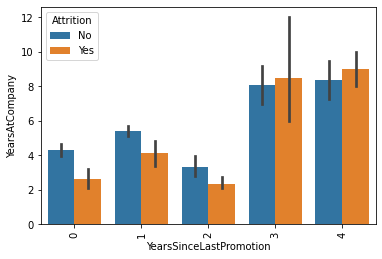

In [181]:
sns.barplot(x=df['YearsSinceLastPromotion'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

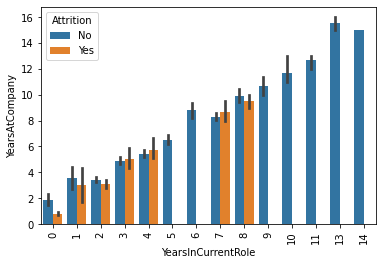

In [182]:
sns.barplot(x=df['YearsInCurrentRole'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

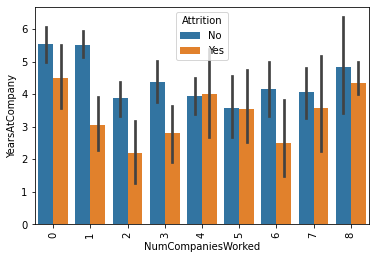

In [183]:
sns.barplot(x=df['NumCompaniesWorked'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Department', ylabel='YearsAtCompany'>

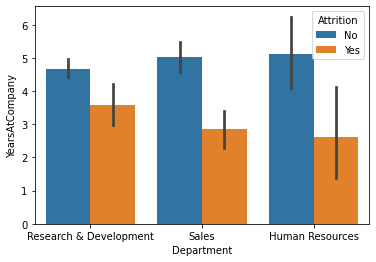

In [184]:
sns.barplot(x=df['Department'],y=df['YearsAtCompany'],hue=df['Attrition'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='YearsAtCompany'>

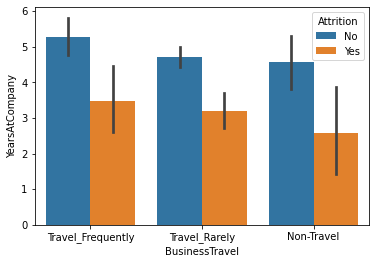

In [185]:
sns.barplot(x=df['BusinessTravel'],y=df['YearsAtCompany'],hue=df['Attrition'])

<AxesSubplot:xlabel='EducationField', ylabel='YearsAtCompany'>

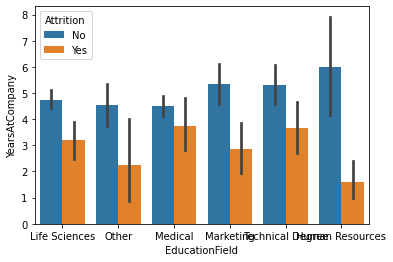

In [186]:
sns.barplot(x=df['EducationField'],y=df['YearsAtCompany'],hue=df['Attrition'])

<AxesSubplot:xlabel='Gender', ylabel='YearsAtCompany'>

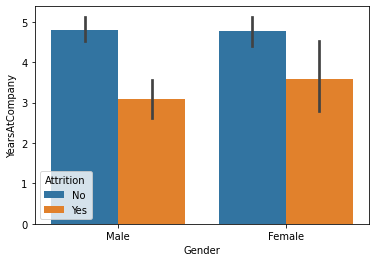

In [187]:
sns.barplot(x=df['Gender'],y=df['YearsAtCompany'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='YearsAtCompany'>

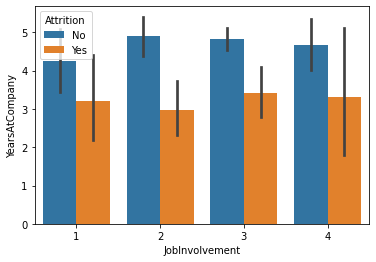

In [188]:
sns.barplot(x=df['JobInvolvement'],y=df['YearsAtCompany'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobLevel', ylabel='YearsAtCompany'>

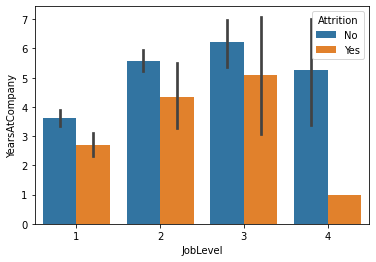

In [189]:
sns.barplot(x=df['JobLevel'],y=df['YearsAtCompany'],hue=df['Attrition'])

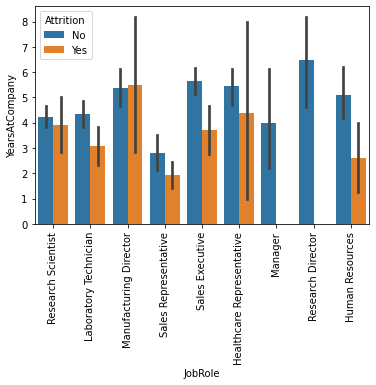

In [190]:
sns.barplot(x=df['JobRole'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

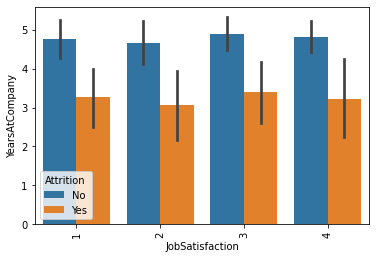

In [191]:

sns.barplot(x=df['JobSatisfaction'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

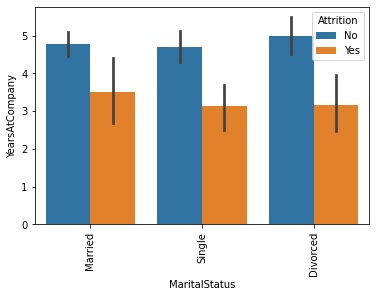

In [192]:
sns.barplot(x=df['MaritalStatus'],y=df['YearsAtCompany'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

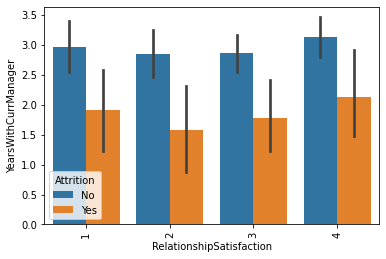

In [193]:
sns.barplot(x=df['RelationshipSatisfaction'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

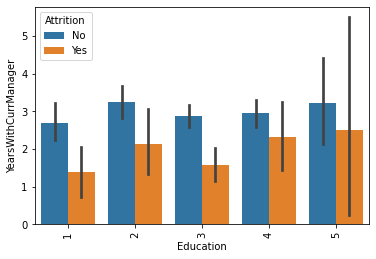

In [194]:
sns.barplot(x=df['Education'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

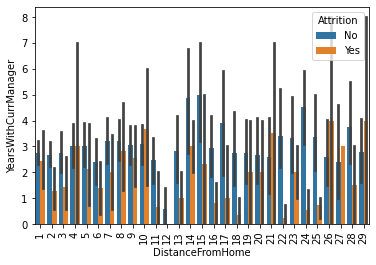

In [195]:
sns.barplot(x=df['DistanceFromHome'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

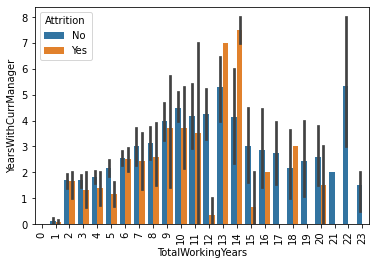

In [196]:
sns.barplot(x=df['TotalWorkingYears'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

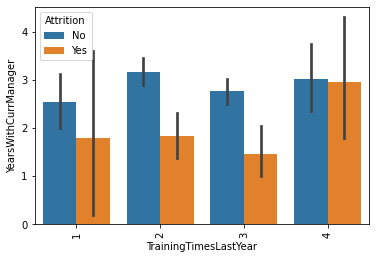

In [197]:
sns.barplot(x=df['TrainingTimesLastYear'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

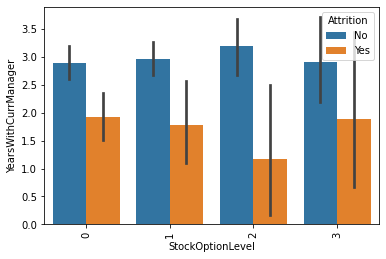

In [198]:
sns.barplot(x=df['StockOptionLevel'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

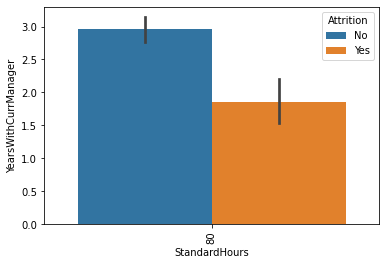

In [199]:
sns.barplot(x=df['StandardHours'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

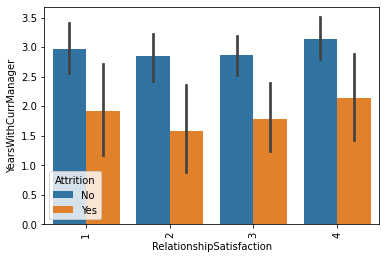

In [200]:
sns.barplot(x=df['RelationshipSatisfaction'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

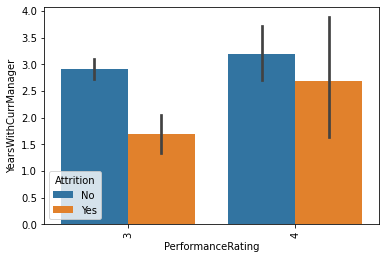

In [201]:
sns.barplot(x=df['PerformanceRating'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

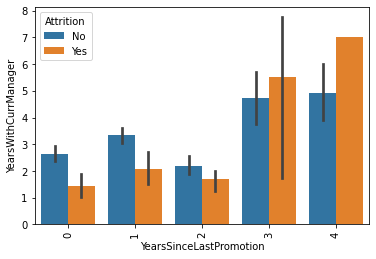

In [202]:
sns.barplot(x=df['YearsSinceLastPromotion'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

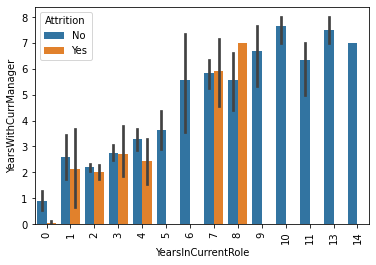

In [203]:
sns.barplot(x=df['YearsInCurrentRole'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

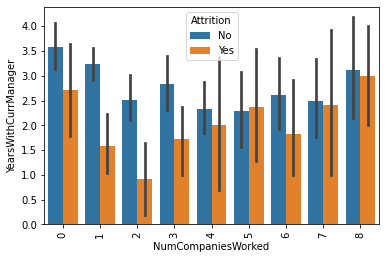

In [204]:
sns.barplot(x=df['NumCompaniesWorked'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Department', ylabel='YearsWithCurrManager'>

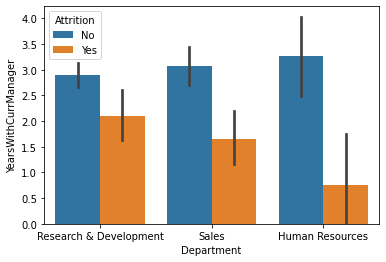

In [205]:
sns.barplot(x=df['Department'],y=df['YearsWithCurrManager'],hue=df['Attrition'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='YearsWithCurrManager'>

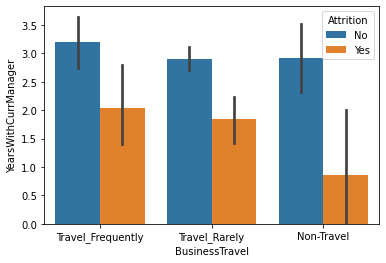

In [206]:
sns.barplot(x=df['BusinessTravel'],y=df['YearsWithCurrManager'],hue=df['Attrition'])

<AxesSubplot:xlabel='EducationField', ylabel='YearsWithCurrManager'>

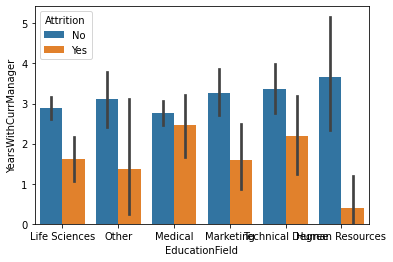

In [207]:
sns.barplot(x=df['EducationField'],y=df['YearsWithCurrManager'],hue=df['Attrition'])

<AxesSubplot:xlabel='Gender', ylabel='YearsWithCurrManager'>

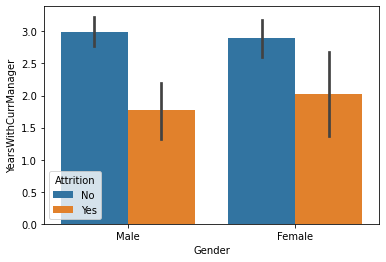

In [208]:
sns.barplot(x=df['Gender'],y=df['YearsWithCurrManager'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='YearsWithCurrManager'>

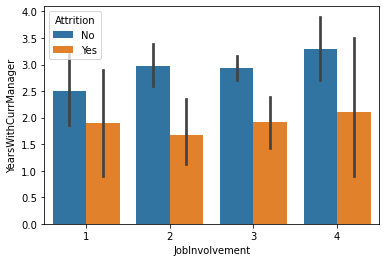

In [209]:
sns.barplot(x=df['JobInvolvement'],y=df['YearsWithCurrManager'],hue=df['Attrition'])

<AxesSubplot:xlabel='JobLevel', ylabel='YearsWithCurrManager'>

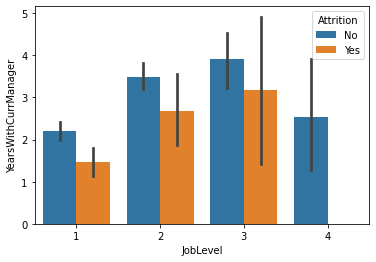

In [210]:
sns.barplot(x=df['JobLevel'],y=df['YearsWithCurrManager'],hue=df['Attrition'])

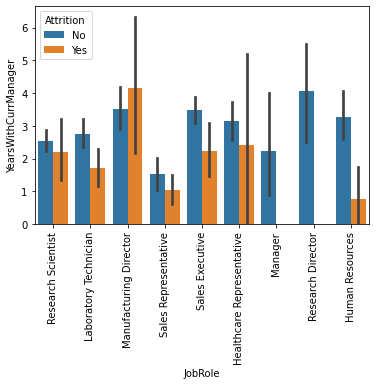

In [211]:
sns.barplot(x=df['JobRole'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

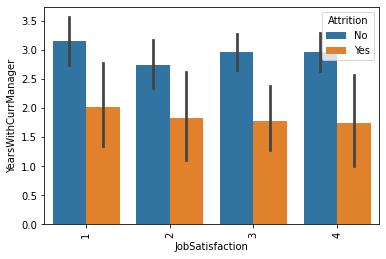

In [212]:

sns.barplot(x=df['JobSatisfaction'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

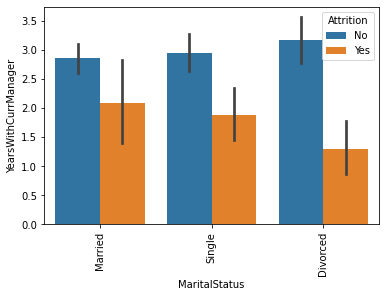

In [213]:
sns.barplot(x=df['MaritalStatus'],y=df['YearsWithCurrManager'],hue=df['Attrition'])
plt.xticks(rotation=90)
plt.show()

In [214]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       823 non-null    int64 
 1   Attrition                 823 non-null    object
 2   BusinessTravel            823 non-null    object
 3   DailyRate                 823 non-null    int64 
 4   Department                823 non-null    object
 5   DistanceFromHome          823 non-null    int64 
 6   Education                 823 non-null    int64 
 7   EducationField            823 non-null    object
 8   EmployeeCount             823 non-null    int64 
 9   EmployeeNumber            823 non-null    int64 
 10  EnvironmentSatisfaction   823 non-null    int64 
 11  Gender                    823 non-null    object
 12  HourlyRate                823 non-null    int64 
 13  JobInvolvement            823 non-null    int64 
 14  JobLevel                 

In [216]:
le=LabelEncoder()

In [217]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\536061538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])


In [218]:
df['Department']=le.fit_transform(df['Department'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\1380810946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Department']=le.fit_transform(df['Department'])


In [219]:
df['EducationField']=le.fit_transform(df['EducationField'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\3247274797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EducationField']=le.fit_transform(df['EducationField'])


In [220]:
df['Attrition']=le.fit_transform(df['Attrition'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\510032095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition']=le.fit_transform(df['Attrition'])


In [221]:
df['Gender']=le.fit_transform(df['Gender'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\3356259088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.fit_transform(df['Gender'])


In [222]:
df['JobRole']=le.fit_transform(df['JobRole'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\4166002130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobRole']=le.fit_transform(df['JobRole'])


In [223]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\697195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])


In [224]:

df['Over18']=le.fit_transform(df['Over18'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\2697627482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Over18']=le.fit_transform(df['Over18'])


In [225]:
df['OverTime']=le.fit_transform(df['OverTime'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19568\3655905075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OverTime']=le.fit_transform(df['OverTime'])


In [226]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,0,325,1,5,3,3,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,0,2,1167,2,5,3,4,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [227]:
y=df['Attrition']

In [228]:
X=df.drop('Attrition',axis=1)

In [229]:
sc=StandardScaler()


In [230]:
X=sc.fit_transform(X)


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [232]:
rfc=RandomForestClassifier()


In [233]:
rfc.fit(X_test,y_test)

RandomForestClassifier()

In [234]:
y_pred=rfc.predict(X_test)


In [235]:
accuracy_score(y_test,y_pred)

1.0

In [236]:
confusion_matrix(y_test,y_pred)

array([[136,   0],
       [  0,  29]], dtype=int64)